In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
# Load the iris dataset
iris = datasets.load_iris()

# Create a DataFrame for the petal length and width
irispetals = pd.DataFrame(iris["data"][:, (2, 3)], columns=("petallength", "petalwidth"))

# Add the target column to the DataFrame
irispetals["target"] = iris["target"]

# Display the DataFrame
irispetals

,petallength,petalwidth,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


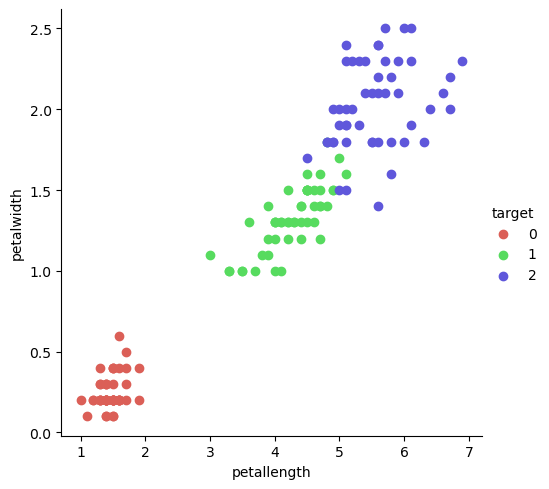

In [12]:
# Create a FacetGrid
g = sns.FacetGrid(irispetals, hue="target", palette="hls", height=5)

# Map the scatter plot onto the grid
g.map(plt.scatter, "petallength", "petalwidth").add_legend()

# Show the plot
plt.show()

In [14]:
X = iris["data"][:,(2,3)] # petal length,petal width
y = (iris["target"] ==2).astype(np.float64) #iris - virginica
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#  create a pipeline with StanadardScaler and LinearSVC Objects 

In [20]:
svm_clf = Pipeline([( "sacler", StandardScaler()),
                    ("linear_svc",LinearSVC(C=1,loss="hinge")), ])
svm_clf.fit(X,y)

Pipeline(steps=[('sacler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

## predict

In [17]:
# Test for Iris-Virginica and Other

print(svm_clf.predict([[5.5, 1.7]]))
print(svm_clf.predict([[4.4, 1.2]]))
print(svm_clf.predict([[2.1, 0.4]]))

[1.]
[0.]
[0.]


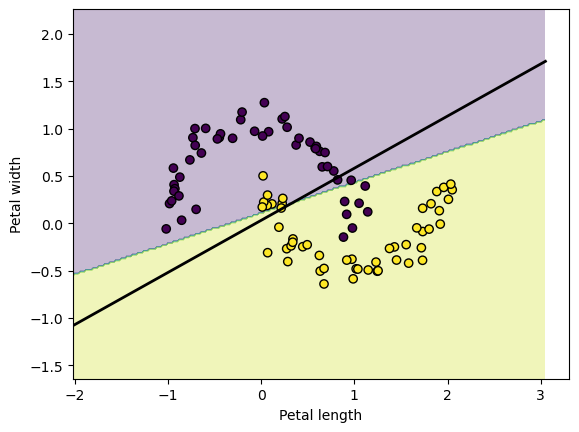

In [49]:
# Plot the decision boundary
def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.named_steps["linear_svc"].coef_[0]
    b = svm_clf.named_steps["linear_svc"].intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    plt.plot(x0, decision_boundary, "k-", linewidth=2)

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plot_svm_decision_boundary(svm_clf, x_min, x_max)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

# Non-Linear-SVC Classification 

In [28]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## import the Moons dataset

In [29]:
X,y = datasets.make_moons(n_samples=100,noise=0.1)

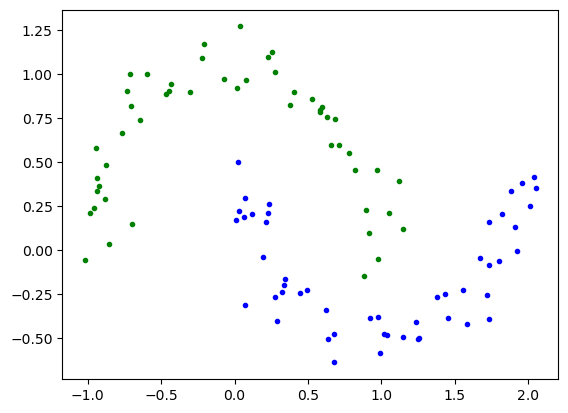

In [33]:
plt.plot(X[:,0][y==1], X[:,1][y==1],"b.")
plt.plot(X[:,0][y==0], X[:,1][y==0],"g.")
plt.show()

In [32]:
y==1

array([False, False, False,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False])

# insert a polynomial feature of degree 3 and run the linearSVC


In [37]:
polynomial_svm_clf = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=3)),
                    ( "sacler", StandardScaler()),
                    ("svm_clg",LinearSVC(C=10,loss="hinge")), 
                    ])
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('sacler', StandardScaler()),
                ('svm_clg', LinearSVC(C=10, loss='hinge'))])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Predict the test set
y_pred = svm_clf.predict(X_test)

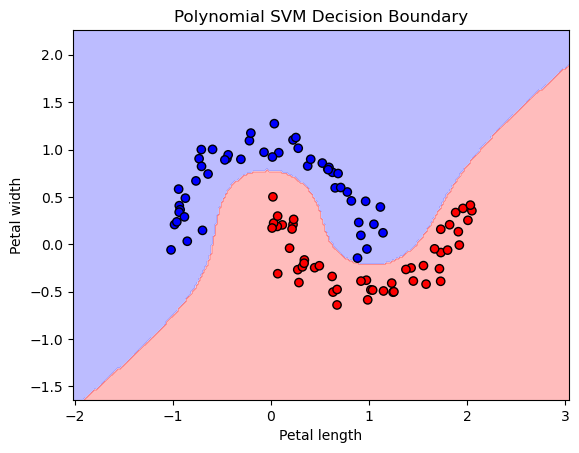

In [50]:


# Function to plot the decision boundary
def plot_svm_decision_boundary(clf, X, y, xmin, xmax, ymin, ymax, resolution=0.02):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution),
                         np.arange(ymin, ymax, resolution))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title("Polynomial SVM Decision Boundary")
    plt.show()

# Define the plot boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot the decision boundary
plot_svm_decision_boundary(polynomial_svm_clf, X, y, x_min, x_max, y_min, y_max)


In [38]:
print(polynomial_svm_clf.predict([[0.5, -0.6]]))
print(polynomial_svm_clf.predict([[0.6, 1]]))
print(polynomial_svm_clf.predict([[1.5, 0.75]]))

[1]
[0]
[0]


In [54]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  1]
 [ 3  6]]


In [55]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



In [56]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.8


# using the polynomial kernal trick

### no need to insert the polynomila feature

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
                   
                    ( "sacler", StandardScaler()),
                    ("svm_clg", SVC(kernel="poly", degree=3, coef0=1,C=5)), 
                    ])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('sacler', StandardScaler()),
                ('svm_clg', SVC(C=5, coef0=1, kernel='poly'))])

In [43]:
print(poly_kernel_svm_clf.predict([[0.5, -0.6]]))
print(poly_kernel_svm_clf.predict([[0.6, 1]]))
print(poly_kernel_svm_clf.predict([[1.5, 0.75]]))

[1]
[0]
[0]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Predict the test set
y_pred = svm_clf.predict(X_test)

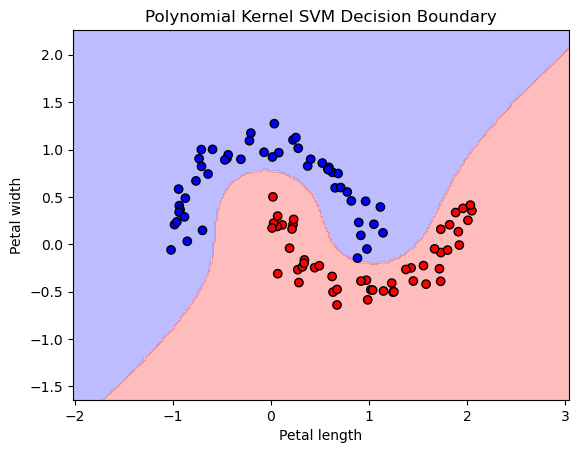

In [51]:
# Function to plot the decision boundary
def plot_svm_decision_boundary(clf, X, y, xmin, xmax, ymin, ymax, resolution=0.02):
    xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution),
                         np.arange(ymin, ymax, resolution))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title("Polynomial Kernel SVM Decision Boundary")
    plt.show()

# Define the plot boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Plot the decision boundary
plot_svm_decision_boundary(poly_kernel_svm_clf, X, y, x_min, x_max, y_min, y_max)

In [46]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  1]
 [ 3  6]]


In [47]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



In [48]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.8
